In [1]:
from dim_reduction import *

In [2]:
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
import umap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('atac.mm10.counts.csv',index_col=0)

In [4]:
metadata=read_metadata('ATAC-seq.cell.labels.txt')

In [5]:
# mask = (metadata[0] != 'excitatory_neuron') & (metadata[0] != 'inhibitory_neuron')

In [6]:
# df = df.loc[:,df.columns[mask]]

In [7]:
df = df * df.sum(axis=0).max() / df.sum(axis=0).values

In [8]:
df = df 
df = filter_matrix(df,20)

83967 peaks removed from dataset


In [9]:
df = PowerTransformer(method="yeo-johnson").fit_transform(df + 1)
# df = log_transformation(df)

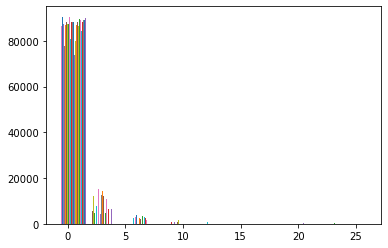

In [10]:
plt.hist(df)
plt.show()

In [22]:
components = reduce_dimensions(n_components=20, df=df.transpose())

[0.0137486  0.01096077 0.00737655 0.00403843 0.00364667 0.00314763
 0.00244741 0.00214356 0.00180187 0.0017384  0.00157554 0.00150698
 0.00149202 0.00148454 0.0014723  0.00146894 0.00145274 0.00145132
 0.00144311 0.00144181]


In [23]:
px.scatter_matrix(components,dimensions=range(4),color=metadata[0].values)

In [24]:
components[0]

array([-5.54540742e-01,  1.51377517e+01,  4.61025018e+01,  1.43647166e+00,
       -5.17394415e+00,  3.66347901e+01, -1.50477992e+01, -1.38558430e+01,
        3.74007209e+00, -1.69219978e+01,  1.89591663e+00, -1.04259333e+01,
       -5.90158255e+00, -1.69352928e+00, -1.34244251e+01,  8.65473163e+00,
        2.25044114e-02,  8.60395670e-01, -9.54463113e+00,  3.28142366e+00])

In [25]:
metadata[0].values

array(['excitatory_neuron', 'excitatory_neuron', 'inhibitory_neuron',
       'excitatory_neuron', 'inhibitory_neuron', 'inhibitory_neuron',
       'excitatory_neuron', 'inhibitory_neuron', 'astrocyte',
       'oligodendrocytes_polydendrocytes', 'inhibitory_neuron',
       'inhibitory_neuron', 'inhibitory_neuron', 'inhibitory_neuron',
       'inhibitory_neuron', 'inhibitory_neuron', 'excitatory_neuron',
       'excitatory_neuron', 'excitatory_neuron', 'excitatory_neuron',
       'inhibitory_neuron', 'inhibitory_neuron', 'excitatory_neuron',
       'inhibitory_neuron', 'microglia', 'excitatory_neuron', 'microglia',
       'inhibitory_neuron', 'excitatory_neuron', 'excitatory_neuron',
       'inhibitory_neuron', 'excitatory_neuron', 'excitatory_neuron',
       'excitatory_neuron', 'excitatory_neuron', 'excitatory_neuron',
       'excitatory_neuron', 'inhibitory_neuron', 'excitatory_neuron',
       'excitatory_neuron', 'inhibitory_neuron', 'excitatory_neuron',
       'inhibitory_neuron', '

In [26]:
x_embedded = TSNE(perplexity=30,n_iter=1000,random_state=0).fit_transform(components)

In [27]:
x_embedded.shape

(836, 2)

In [28]:
px.scatter(x=x_embedded[:,1],y=x_embedded[:,0],color=metadata[0])

In [29]:
reducer = umap.UMAP()

In [30]:
embedding = reducer.fit_transform(components)

In [31]:
embedding.shape

(836, 2)

In [32]:
px.scatter(x=embedding[:,0],y=embedding[:,1],color=metadata[0])